This notebook examines the basic stats and shape of the data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
#%matplotlib notebook


import re

from functools import partial

import plotly.graph_objects as go

Import the cleaned data:

In [2]:
%ls -lt ../../data/genre_lists/data_ready_for_model/

total 37256
-rw-r--r--  1 Daniel  staff    57474 May 20 12:47 corpus.mm.index
-rw-r--r--  1 Daniel  staff   382436 May 20 12:47 corpus.mm
-rw-r--r--  1 Daniel  staff    49966 May 20 12:47 genre_dictionary.dict
drwxr-xr-x  5 Daniel  staff      160 May 20 10:59 logistic_model_data/
-rw-r--r--  1 Daniel  staff    66235 May 18 11:17 promiscuity_table.csv
-rw-r--r--  1 Daniel  staff    10926 May 18 11:10 genre_label_non-lonely_TRAINING_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff     8664 May 18 11:09 genre_label_lonely_TRAINING_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff    19587 May 18 11:09 genre_label_counts_TRAINING_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff   312423 May 18 10:47 genre_lists.txt
-rw-r--r--  1 Daniel  staff    19795 May 18 10:46 unique_genres.txt
-rw-r--r--  1 Daniel  staff   233078 May 18 10:36 wiki-kaggle_y_train_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff    58432 May 18 10:36 wiki-kaggle_y_test_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff   6

In [3]:
%store -r now
now
#now = '2020-05-11-14-35'

'2020-05-18-10-06'

In [4]:
X_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now), index_col = ['artist'])
y_train = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now), index_col = ['artist'])

In [5]:
X_train.head()

,genrelist,genrelist_length
artist,,
Pablo_Holman,"['pop', 'rock', 'emo_pop']",3
Bobby_Edwards,['country'],1
La_Palabra,"['afro_cuban_jazz', 'son_montuno', 'guaracha',...",4
Sherrick,"['r_and_b', 'soul']",2
Allen_Collins,['southern_rock'],1


In [6]:
X_train.shape, y_train.shape

((12376, 2), (12376, 1))

In [7]:
data = y_train.join( [X_train], how = 'outer')

In [8]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"['pop', 'rock', 'emo_pop']",3
Bobby_Edwards,male,['country'],1
La_Palabra,male,"['afro_cuban_jazz', 'son_montuno', 'guaracha',...",4
Sherrick,male,"['r_and_b', 'soul']",2
Allen_Collins,male,['southern_rock'],1


In [9]:
data.shape, data.isnull().sum()

((12376, 3),
 gender              0
 genrelist           0
 genrelist_length    0
 dtype: int64)

### Genre Labels

Each value of the genre column is a _string_ of comma separated genre labels. We want to convert it to a _list_ of strings.

In [10]:
"""This function takes in a string of the form
appearing in the genrelist of the dataframe.
It strips the square brackets and extra quotes and
returns a list of strings where each string is a genre label."""
def genrelist(string):
    string = string.strip("[").strip("]").replace("'","")
    L = [s for s in string.split(',')]
    L_new = []
    for x in L:
        L_new.append(x.replace(" ","_").lstrip("_").rstrip("_"))
    while (str("") in L_new):
        L_new.remove("")
    return L_new

Now we apply it to the whole column and put the lists in a new column:

In [11]:
data['genrelist']= data['genrelist'].apply(genrelist)

In [12]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3
Bobby_Edwards,male,[country],1
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4
Sherrick,male,"[r_and_b, soul]",2
Allen_Collins,male,[southern_rock],1


### Extract unique genre labels: 

### This is for the training set:

In [13]:
# genre_list = data.genrelist.values.tolist()
# genre_list = [x for y in genre_list for x in y]
# genre_list = list(set(genre_list))

### Import the labels from the whole data set:

In [14]:
then = '2020-05-11-14-34'

In [15]:
genrelist_df = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_list_{}.csv'.format(now), index_col = 'Unnamed: 0')

In [16]:
genrelist_df[:5]

,genre_list
0,chilean
1,zamba
2,afro_punk_blues
3,crunk
4,spanish_guitar


In [17]:
genrelist_df.shape

(1494, 1)

In [18]:
print('There are {} artists with genre and binary-gender labels.'.format(data.shape[0]))
print('There are {} unique genre labels.'.format(genrelist_df.shape[0]))
print('Previously there were 1669 unique genre lables.')

There are 12376 artists with genre and binary-gender labels.
There are 1494 unique genre labels.
Previously there were 1669 unique genre lables.


### Export the list of genres:

In [19]:
# genre_list_df = pd.DataFrame({'genre_list':genre_list})

In [20]:
#  genre_list_df.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_list_training_{}.csv'.format(now))

In [21]:
%ls -lt ../../data/genre_lists/data_ready_for_model/

total 37256
-rw-r--r--  1 Daniel  staff    57474 May 20 12:47 corpus.mm.index
-rw-r--r--  1 Daniel  staff   382436 May 20 12:47 corpus.mm
-rw-r--r--  1 Daniel  staff    49966 May 20 12:47 genre_dictionary.dict
drwxr-xr-x  5 Daniel  staff      160 May 20 10:59 logistic_model_data/
-rw-r--r--  1 Daniel  staff    66235 May 18 11:17 promiscuity_table.csv
-rw-r--r--  1 Daniel  staff    10926 May 18 11:10 genre_label_non-lonely_TRAINING_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff     8664 May 18 11:09 genre_label_lonely_TRAINING_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff    19587 May 18 11:09 genre_label_counts_TRAINING_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff   312423 May 18 10:47 genre_lists.txt
-rw-r--r--  1 Daniel  staff    19795 May 18 10:46 unique_genres.txt
-rw-r--r--  1 Daniel  staff   233078 May 18 10:36 wiki-kaggle_y_train_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff    58432 May 18 10:36 wiki-kaggle_y_test_2020-05-18-10-06.csv
-rw-r--r--  1 Daniel  staff   6

In [22]:
data_male = data[data.gender == 'male']
data_female = data[data.gender == 'female']

In [23]:
tot = data.shape[0]
m = data_male.shape[0]
f = data_female.shape[0]
print('{} total artists'.format(tot))
print('{} female artists, or {:0.0f}%'.format(f, 100*f/(f+m)))
print('{} male artists, or {:0.0f}%'.format(m, 100*m/(f+m)))

12376 total artists
3847 female artists, or 31%
8529 male artists, or 69%


### Count the min, mean, max of number of genres:

In [24]:
n = data.shape[0]
a,b,c = data.genrelist_length.mean(), data.genrelist_length.std(), data.genrelist_length.max()
print('Total:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Total:
12376 Artists.
Mean number of genre labels: 2.7.
STD of the number of genre labels: 1.83.
Max number of genre labels: 73.


### Count the min, mean, max of number of genres for male and female artists:

In [25]:
data_female = data[data.gender == 'female']
n = data_female.shape[0]
a,b,c = data_female.genrelist_length.mean(), data_female.genrelist_length.std(), data_female.genrelist_length.max()
print('Female:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Female:
3847 Artists.
Mean number of genre labels: 2.63.
STD of the number of genre labels: 1.52.
Max number of genre labels: 11.


In [26]:
# plt.hist(data_female.num_genres, bins = 25, density = True)
# plt.show()

In [27]:
data_male = data[data.gender == 'male']
m = data_male.shape[0]
a,b,c = data_male.genrelist_length.mean(), data_male.genrelist_length.std(), data_male.genrelist_length.max()
print('Male:')
print(f'{m} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Male:
8529 Artists.
Mean number of genre labels: 2.74.
STD of the number of genre labels: 1.95.
Max number of genre labels: 73.


In [28]:
# plt.hist(data_male.num_genres, bins = 25, density = True)
# plt.show()

Set variables:

In [29]:
max_num_male = 73
max_num_female = 11
max_num = max(max_num_female, max_num_male)

### The histograms for genre labels for male and female artists. 

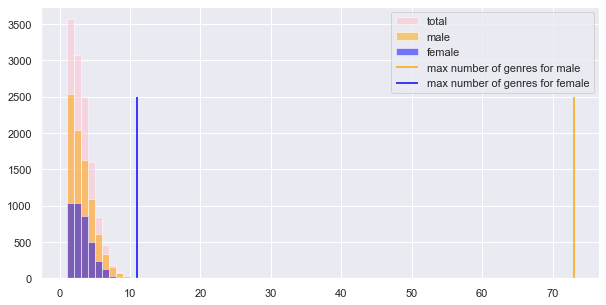

In [30]:
plt.figure(figsize = (10, 5))
plt.hist(data.genrelist_length, bins = range(1,max_num), density = False, color = 'pink', alpha = .5, label = 'total')
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = False, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 2500, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 2500, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = False, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities: the heights are scaled so as the sum of all heights is 1.

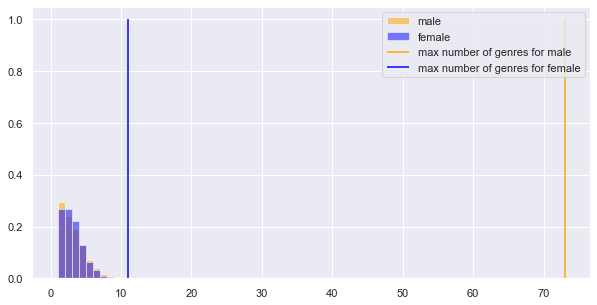

In [31]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = True, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 1, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 1, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = True, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities; three bins: $[1, mean)$, $[mean,2 \cdot mean)$, $[2 \cdot mean,max]$

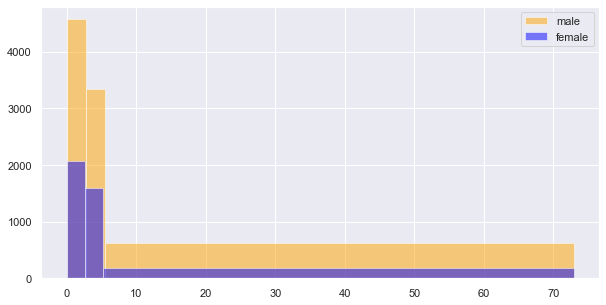

In [32]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = [0,data_male.genrelist_length.mean(),2*data_male.genrelist_length.mean(),max_num], density = False, color = 'orange', alpha = .5, label = 'male')
plt.hist(data_female.genrelist_length, bins = [0,data_female.genrelist_length.mean(),2*data_female.genrelist_length.mean(),max_num], density = False, color = 'blue', alpha = .5, label = 'female')
plt.legend()
plt.show()

## What are the most common genre labels? 

(This deals only with the training data, not the test data.)

### Count the number of times that a label occurs:

In [33]:
genre_list_1 = data.genrelist.values.tolist()
genre_list_1 = [x for y in genre_list_1 for x in y]
genre_counts = pd.Series(genre_list_1)
label_value_counts = genre_counts.value_counts()

In [34]:
label_value_counts[:20]

pop                 2617
rock                1765
r_and_b             1647
country             1613
hip_hop             1114
folk                1046
soul                1023
jazz                 962
alternative_rock     937
blues                859
pop_rock             661
hard_rock            616
indie_rock           495
heavy_metal          453
folk_rock            403
punk_rock            369
gospel               346
blues_rock           335
dance                307
rock_and_roll        299
dtype: int64

In [35]:
print('In the training data there are {} unique genre labels.'.format(label_value_counts.shape[0]))

In the training data there are 1353 unique genre labels.


Export:

In [36]:
# label_value_counts.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_counts_TRAINING_{}.csv'.format(now))

In [37]:
lonely = label_value_counts[label_value_counts <2]
print('There are {} genre labels that only appear for a single artist'.format(lonely.sum()))

There are 585 genre labels that only appear for a single artist


In [38]:
# lonely.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_lonely_TRAINING_{}.csv'.format(now))

In [39]:
non_lonely = label_value_counts[label_value_counts >1]
print('There are {} genre labels that appear for at least two artists'.format(non_lonely.shape[0]))

There are 768 genre labels that appear for at least two artists


In [40]:
# non_lonely.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_label_non-lonely_TRAINING_{}.csv'.format(now))

### Which of the lonely labels appear as the only genre label?

First extract the artists with only one genre label:

In [41]:
genre_isolated_artists = data[data.genrelist_length == 1]

In [42]:
genre_isolated_artists.head()

,gender,genrelist,genrelist_length
artist,,,
Bobby_Edwards,male,[country],1
Allen_Collins,male,[southern_rock],1
Garland_Green,male,[soul],1
Claude_Gray,male,[country],1
Anna_Margaret_Collins,female,[pop],1


In [43]:
genre_isolated_artists.shape[0]

3561

This function marks whether the single genre label of the artist is one that only appears once (and thus for that artist).

In [44]:
def isolated(x):
    if x.genrelist[0] in lonely.index.values:
        x['lonely_isolated'] = 1  
    else: 
        x['lonely_isolated'] = 0
    return x

In [45]:
genre_isolated_artists = genre_isolated_artists.apply(isolated, axis = 1)

In [46]:
genre_isolated_artists.head()

,gender,genrelist,genrelist_length,lonely_isolated
artist,,,,
Bobby_Edwards,male,[country],1,0
Allen_Collins,male,[southern_rock],1,0
Garland_Green,male,[soul],1,0
Claude_Gray,male,[country],1,0
Anna_Margaret_Collins,female,[pop],1,0


Select the artists which are both genre_isolated and for which the genre is lonley (within this data set):

In [47]:
isolated_lonley_artists = genre_isolated_artists[genre_isolated_artists.lonely_isolated == 1]

In [48]:
isolated_lonley_artists.shape[0]

54

We conclude that of the 585 labels that only appear once, ~90% of these appear for artists which have multiple genre labels. 

Here are the frequencies of the sizes of genre lists:

In [49]:
list_length_counts = data.groupby(['genrelist_length']).count()
list_length_counts.drop(['gender'], axis = 1, inplace = True)
list_length_counts.columns = ['artist_count']

In [50]:
list_length_counts

,artist_count
genrelist_length,
1,3561
2,3067
3,2488
4,1594
5,850
6,462
7,181
8,92
9,37


And here are the frequencies of the lengths of lists by gender:

In [51]:
list_length_counts_gender = data.groupby(['genrelist_length','gender']).count()
list_length_counts_gender.columns = ['artist_count']
list_length_counts_gender

artist_count
genrelist_length gender              
1                female          1031
                 male            2530
2                female          1030
                 male            2037
3                female           854
                 male            1634
4                female           502
                 male            1092
5                female           243
                 male             607
6                female           127
                 male             335
7                female            27
                 male             154
8                female            15
                 male              77
9                female             9
                 male              28
10               female             3
                 male              16
11               female             6
                 male               5
12               male               7
13               male               2
14               male               1
15               male               2
45               male               1
73               male               1

Now include the absolute and relative frequencies by gender:

In [52]:
list_length_counts_gender.reset_index(inplace = True)
list_length_counts_gender.set_index(['genrelist_length'], inplace = True)
list_length_counts_gender = list_length_counts_gender.pivot(columns = 'gender')
list_length_counts_gender[('artist_count','female_relative')] = \
                                            round(list_length_counts_gender[('artist_count', 'female')]/f,3)
list_length_counts_gender[('artist_count','male_relative')] = \
                                            round(list_length_counts_gender[('artist_count', 'male')]/m,3)
#list_length_counts_gender.fillna(-1)
list_length_counts_gender[('artist_count','male_to_female_relative_ratio')] = \
             round(list_length_counts_gender[('artist_count', 'male_relative')]/ \
             list_length_counts_gender[('artist_count', 'female_relative')],3)
# list_length_counts_gender.apply(lambda x: round(x,3) if x.name in )

In [53]:
list_length_counts_gender

artist_count                                        \
gender                 female    male female_relative male_relative   
genrelist_length                                                      
1                      1031.0  2530.0           0.268         0.297   
2                      1030.0  2037.0           0.268         0.239   
3                       854.0  1634.0           0.222         0.192   
4                       502.0  1092.0           0.130         0.128   
5                       243.0   607.0           0.063         0.071   
6                       127.0   335.0           0.033         0.039   
7                        27.0   154.0           0.007         0.018   
8                        15.0    77.0           0.004         0.009   
9                         9.0    28.0           0.002         0.003   
10                        3.0    16.0           0.001         0.002   
11                        6.0     5.0           0.002         0.001   
12                        NaN     7.0             NaN         0.001   
13                        NaN     2.0             NaN         0.000   
14                        NaN     1.0             NaN         0.000   
15                        NaN     2.0             NaN         0.000   
45                        NaN     1.0             NaN         0.000   
73                        NaN     1.0             NaN         0.000   

                                                
gender           male_to_female_relative_ratio  
genrelist_length                                
1                                        1.108  
2                                        0.892  
3                                        0.865  
4                                        0.985  
5                                        1.127  
6                                        1.182  
7                                        2.571  
8                                        2.250  
9                                        1.500  
10                                       2.000  
11                                       0.500  
12                                         NaN  
13                                         NaN  
14                                         NaN  
15                                         NaN  
45                                         NaN  
73                                         NaN

In [54]:
#list_length_counts_gender.to_html('/Users/Daniel/Code/Genre/visualizations/genrelist_length_likelihoods.html')

A table in plotly:

In [55]:
df = list_length_counts_gender

In [56]:
# fig = go.Figure(data=[go.Table(
#     header=dict(values=[list_length_counts_gender.index.name]+list(df.columns),
#                 fill_color='paleturquoise',
#                 align='left'),
#     cells=dict(values=[df.index, \
#                        df[('artist_count','female')], \
#                        df[('artist_count','male')], \
#                        df[('artist_count','female_relative')], \
#                        df[('artist_count','male_relative')], \
#                        df[('artist_count','male_to_female_relative_ratio')]\
#                       ], \
#                fill_color='lavender',
#                align='left'))
# ])

# fig.show()

In [57]:
#fig.write_image('/Users/Daniel/Code/Genre/visualizations/genrelist_length_likelihoods.pdf')

### Now let's count the most common genre labels for male and female... TBD

## Promiscuity Plot: Graph of how genres are distributed among genre list sizes

Plan: plot (x = genre, y = n (length of genre list), z = # of artists with genre in their list of n labels ) as heat map

In [58]:
promiscuity = data.copy(deep = True)

In [59]:
promiscuity.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3
Bobby_Edwards,male,[country],1
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4
Sherrick,male,"[r_and_b, soul]",2
Allen_Collins,male,[southern_rock],1


Create column for every genre label. (use full set or train set?)

In [60]:
for label in label_value_counts.index:
    promiscuity[label] = 0
    promiscuity[label].astype('int64')

In [61]:
promiscuity.head()

,gender,genrelist,genrelist_length,pop,rock,r_and_b,country,hip_hop,folk,soul,...,composer,cybergrind,female_vocalists,swedish_pop,retro,goregrind,blues_jazz,traditional_acoustic_blues,vaudeville_blues,vocal_group
artist,,,,,,,,,,,,,,,,,,,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bobby_Edwards,male,[country],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sherrick,male,"[r_and_b, soul]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allen_Collins,male,[southern_rock],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Define Function for one-hot encoding:

In [62]:
"""One-hot encoding"""
def one_hot_label(x):
    for label in x.genrelist:
        x[label] = 1
    return x

In [63]:
for label in promiscuity.columns[2:]:
    promiscuity[label].astype('int64')

Apply:

In [64]:
promiscuity = promiscuity.apply(one_hot_label, axis = 1)

In [65]:
promiscuity.head()

,gender,genrelist,genrelist_length,pop,rock,r_and_b,country,hip_hop,folk,soul,...,composer,cybergrind,female_vocalists,swedish_pop,retro,goregrind,blues_jazz,traditional_acoustic_blues,vaudeville_blues,vocal_group
artist,,,,,,,,,,,,,,,,,,,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bobby_Edwards,male,[country],1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sherrick,male,"[r_and_b, soul]",2,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Allen_Collins,male,[southern_rock],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
promiscuity['genrelist_length']

artist
Pablo_Holman     3
Bobby_Edwards    1
La_Palabra       4
Sherrick         2
Allen_Collins    1
                ..
Steve_Gaines     2
Dan_Hoerner      3
Detail           2
Billy_Woods      1
Dani_Filth       4
Name: genrelist_length, Length: 12376, dtype: int64

In [67]:
promiscuity_count = promiscuity.groupby(['genrelist_length'], as_index = False).sum() # as_index = False is needed to maintain dtype = int; deals with a pandas bug

In [68]:
promiscuity_count

,genrelist_length,pop,rock,r_and_b,country,hip_hop,folk,soul,jazz,alternative_rock,...,composer,cybergrind,female_vocalists,swedish_pop,retro,goregrind,blues_jazz,traditional_acoustic_blues,vaudeville_blues,vocal_group
0,1,418,212,71,720,443,118,21,176,68,...,0,0,0,1,0,0,0,0,0,0
1,2,692,426,391,322,227,227,189,190,132,...,0,0,0,0,0,0,1,0,0,0
2,3,684,418,475,223,195,273,281,193,201,...,0,0,0,0,0,0,0,1,0,1
3,4,409,314,312,167,115,206,226,163,188,...,1,0,1,0,0,0,0,0,0,0
4,5,209,198,206,85,61,109,150,102,139,...,0,0,0,0,1,0,0,0,0,0
5,6,108,104,99,44,36,56,80,65,119,...,0,0,0,0,0,0,0,0,0,0
6,7,42,39,43,23,19,26,38,29,50,...,0,0,0,0,0,1,0,0,1,0
7,8,26,25,24,15,7,15,18,22,22,...,0,0,0,0,0,0,0,0,0,0
8,9,14,14,12,6,4,6,9,9,9,...,0,0,0,0,0,0,0,0,0,0
9,10,4,5,4,3,2,1,1,6,5,...,0,0,0,0,0,0,0,0,0,0


We record the dtypes: the need to do this may be becaues of a NaN present somewhere

In [69]:
dtypes_before = promiscuity_count.dtypes

Add subtotals for each genre:

In [70]:
promiscuity_count.at['subtotals'] = promiscuity_count.sum()

To maintain ints we reset the dtypes:

In [71]:
promiscuity_count = promiscuity_count.astype(dtypes_before)
promiscuity_count.set_index(['genrelist_length'], inplace = True)

NOTE: subtotals row is now labeled as 238 (dtype = int64).

Let's look at the most frequent genres:

In [72]:
promiscuity_count.iloc[:,:7]

,pop,rock,r_and_b,country,hip_hop,folk,soul
genrelist_length,,,,,,,
1,418,212,71,720,443,118,21
2,692,426,391,322,227,227,189
3,684,418,475,223,195,273,281
4,409,314,312,167,115,206,226
5,209,198,206,85,61,109,150
6,108,104,99,44,36,56,80
7,42,39,43,23,19,26,38
8,26,25,24,15,7,15,18
9,14,14,12,6,4,6,9


In [73]:
promiscuity_count_100 = promiscuity_count[promiscuity_count.columns[promiscuity_count.loc[238] >100]]

In [74]:
promiscuity_count_100

,pop,rock,r_and_b,country,hip_hop,folk,soul,jazz,alternative_rock,blues,...,world,rockabilly,electro_pop,experimental_rock,jazz_fusion,alternative,pop_punk,power_pop,art_rock,indie_folk
genrelist_length,,,,,,,,,,,,,,,,,,,,,
1,418,212,71,720,443,118,21,176,68,116,...,8,6,6,2,0,10,3,4,0,4
2,692,426,391,322,227,227,189,190,132,179,...,13,27,20,12,18,20,11,15,8,19
3,684,418,475,223,195,273,281,193,201,169,...,30,27,28,16,27,39,21,24,14,34
4,409,314,312,167,115,206,226,163,188,148,...,33,31,28,22,22,22,23,31,36,22
5,209,198,206,85,61,109,150,102,139,114,...,18,14,25,24,22,14,29,24,18,13
6,108,104,99,44,36,56,80,65,119,57,...,12,8,6,19,18,9,18,15,21,3
7,42,39,43,23,19,26,38,29,50,38,...,4,5,6,17,7,2,7,1,7,4
8,26,25,24,15,7,15,18,22,22,19,...,6,5,2,5,3,2,3,0,4,1
9,14,14,12,6,4,6,9,9,9,9,...,3,1,0,1,3,1,2,0,1,1


In [75]:
promiscuity_count.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/promiscuity_table.csv')

In [76]:
promiscuity_count = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/promiscuity_table.csv', index_col = 'genrelist_length')

Use log of promiscuity count:

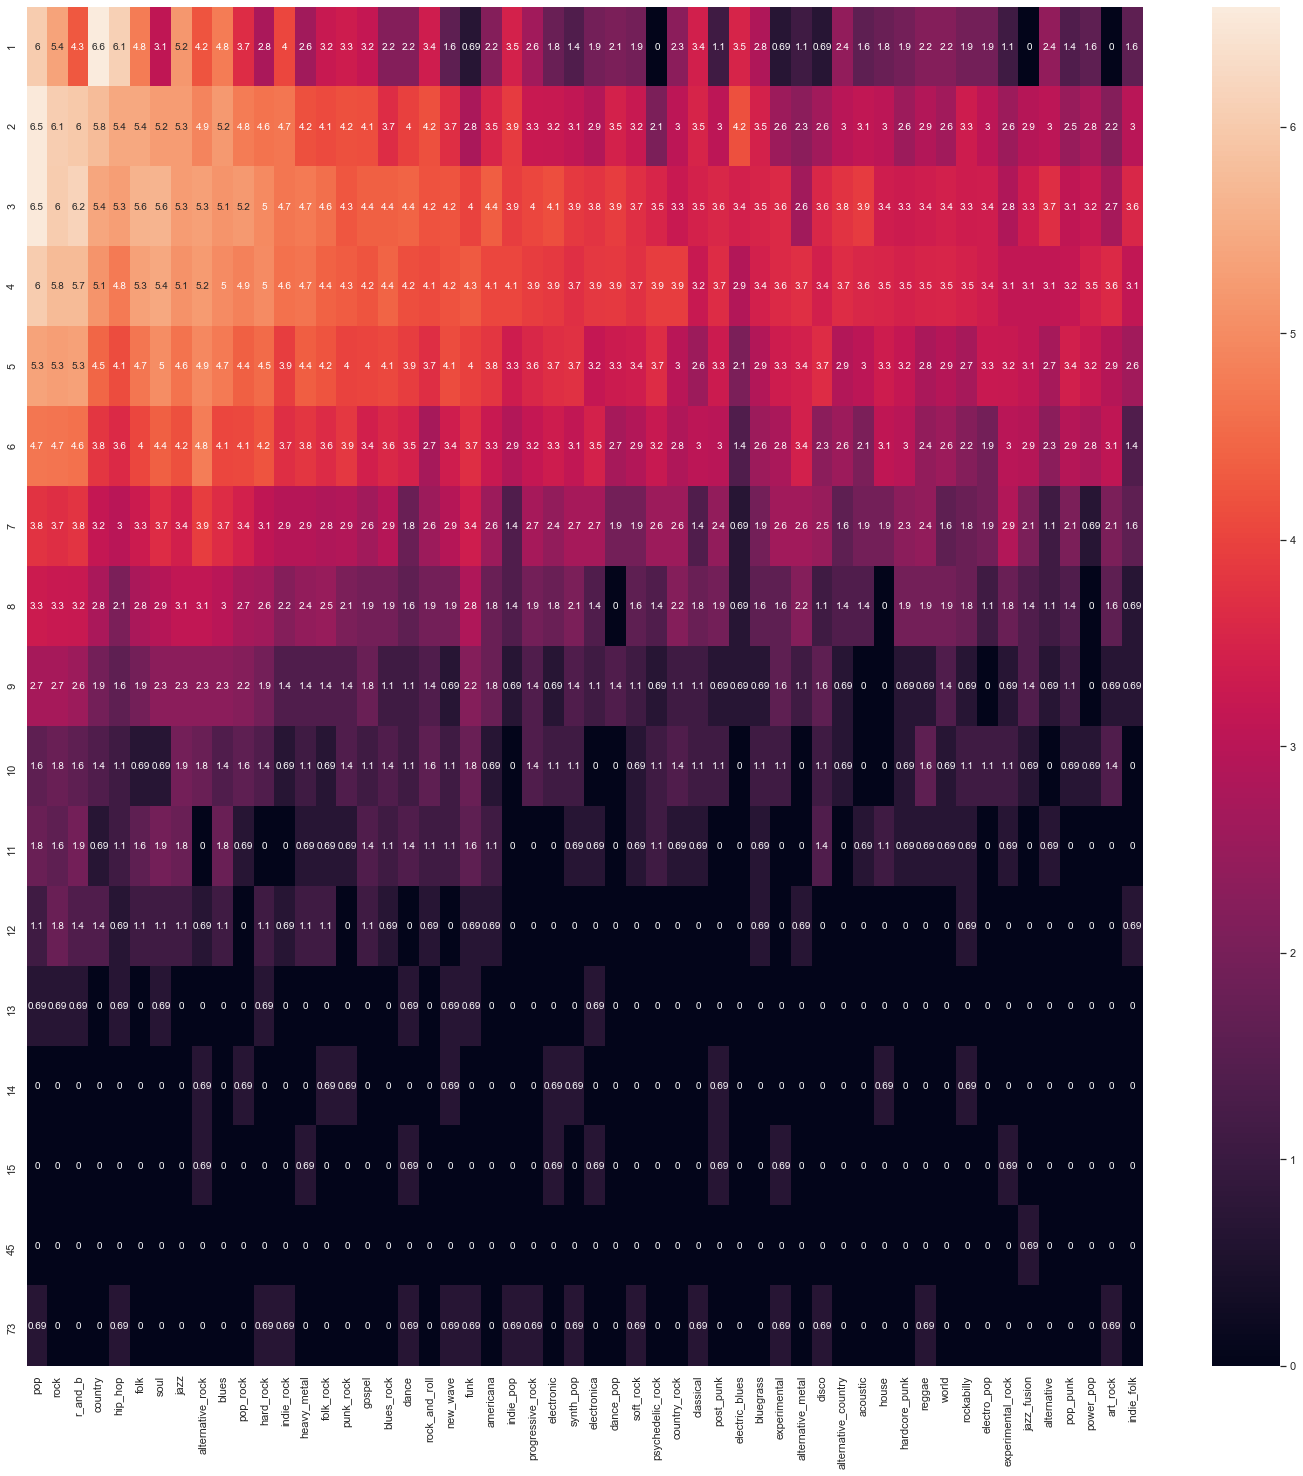

In [77]:
plt.figure(figsize = (25,25))
sns.heatmap(np.log(promiscuity_count_100.values[:-1,:]+1), xticklabels = promiscuity_count_100.columns, yticklabels = promiscuity_count_100.index[:-1]   , annot = True, cbar = True)

Now let's look at a relative metric:

In [78]:
promiscuity_count_relative = promiscuity_count_100.copy(deep = True)
for genre in promiscuity_count_relative.columns:
    promiscuity_count_relative[genre] = promiscuity_count_relative[genre]/promiscuity_count_100.loc[238,genre]

In [79]:
# promiscuity_count_relative

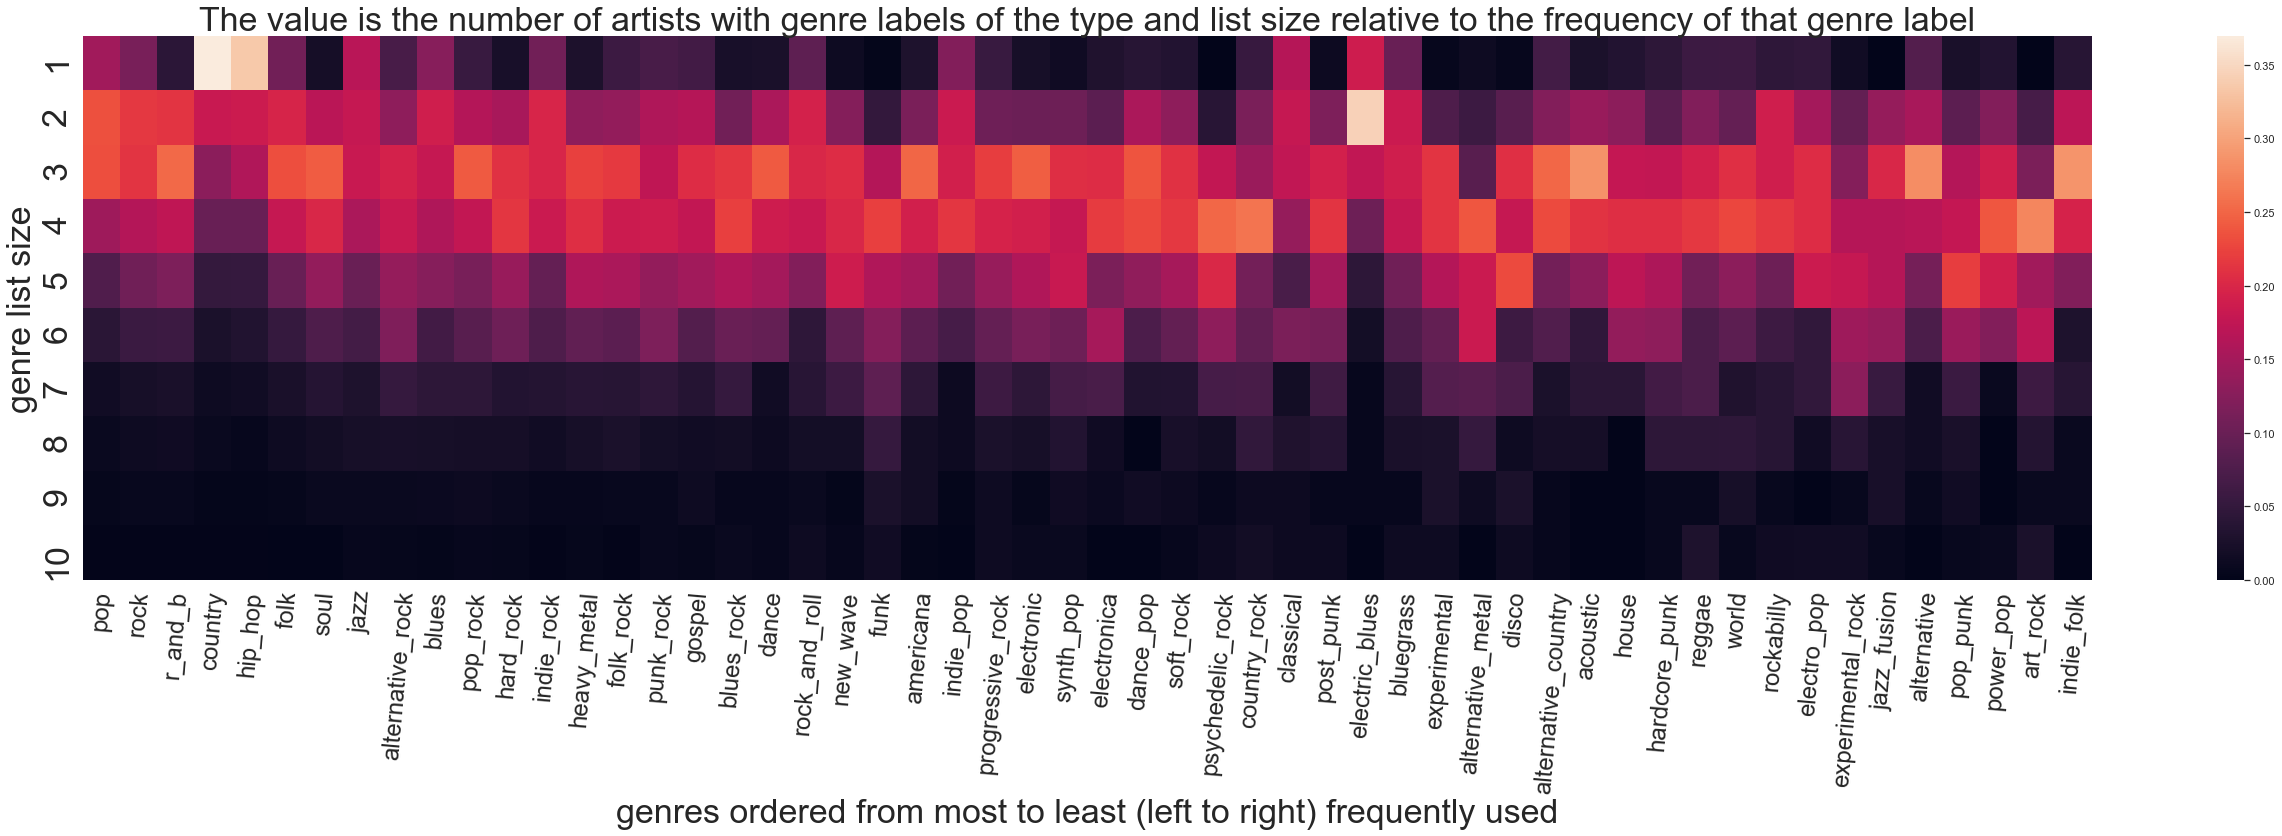

In [80]:
plt.figure(figsize = (45,10))
sns.heatmap(np.log(promiscuity_count_relative.values[:10,:]+1), xticklabels = promiscuity_count_relative.columns, yticklabels = promiscuity_count_relative.index[:10]   , annot = False, cbar = True)
plt.ylabel('genre list size', fontsize = 34)
plt.xlabel('genres ordered from most to least (left to right) frequently used', fontsize = 34)
plt.title('The value is the number of artists with genre labels of the type and list size relative to the frequency of that genre label', fontsize = 34)
plt.xticks(rotation = 85, fontsize = 24)
plt.yticks(fontsize = 34)
plt.savefig('/Users/Daniel/Code/Genre/visualizations/promiscuity_relative_plot.pdf', bbox_inches = 'tight')

# The following needs to be organized and directed:

it is similar to the promiscuity plot, but uses >= rather than = for counting promiscuity

### Let's take a look at which genre labels appear when there are at least G genre labels (G to be determined).

In [81]:
data.head()

,gender,genrelist,genrelist_length
artist,,,
Pablo_Holman,male,"[pop, rock, emo_pop]",3
Bobby_Edwards,male,[country],1
La_Palabra,male,"[afro_cuban_jazz, son_montuno, guaracha, salsa...",4
Sherrick,male,"[r_and_b, soul]",2
Allen_Collins,male,[southern_rock],1


In [82]:
G = 6

In [83]:
data_many = data[data.genrelist_length >= G]

In [84]:
data_many.shape

(816, 3)

### List of genre labels that appear for artists with at least G labels:

In [85]:
# preliminary list of lists
genre_list_G = data_many.genrelist.values.tolist()

In [86]:
genre_list_G[:2]

[['jazz', 'blues', 'swing', 'pop', 'rock', 'r_and_b'],
 ['r_and_b', 'hard_rock', 'blues_rock', 'blues', 'jazz', 'jazz_fusion']]

In [87]:
# flatten the list of lists to a list
genre_list_G = [x for y in genre_list_G for x in y]

Count the number of times that a label occurs, filter out labels that occur less than 100 times

In [88]:
ser = pd.Series(genre_list_G)
#ser.value_counts()[ser.value_counts() > 99]
df = pd.DataFrame(ser.value_counts(),  columns = ['frequency in lists with at least {} genres'.format(G)])
df.index.name = 'genre'

In [89]:
df

,frequency in lists with at least 6 genres
genre,
alternative_rock,209
pop,204
rock,197
r_and_b,192
soul,155
...,...
2_tone,1
rumba,1
rock_ballads,1


In [90]:
lvc = pd.DataFrame(label_value_counts, columns = ['frequency'])
lvc.index.name = 'genre'

In [91]:
lvc

,frequency
genre,
pop,2617
rock,1765
r_and_b,1647
country,1613
hip_hop,1114
...,...
goregrind,1
blues_jazz,1
traditional_acoustic_blues,1


In [92]:
df2 = df.join(lvc, how = 'left')

In [93]:
df2['relative frequency %'] = round(100*df2['frequency in lists with at least {} genres'.format(G)]/df2['frequency'],2)

In [94]:
df2 = df2.sort_values(['relative frequency %'], axis = 0, ascending = False)

In [95]:
#df2.iloc[-20:]

In [96]:
df2.to_html('/Users/Daniel/Code/Genre/visualizations/appearances_in_list_with_at_least_{}_genres.html'.format(G))

The unique values of these promiscuous genres:

In [97]:
genre_list_G_unique = list(set(genre_list_G))
print(f'There are {len(genre_list_G_unique)} unique genre labels used for artists with at least 6 labels')

There are 698 unique genre labels used for artists with at least 6 labels


Look at those labels which are used for artists with $N$ or more labels and not for artists with $<N$ labels.

We also want to look at these in terms of gender...

Tom asked: what other genre labels appear with 'electric_blues'?

In [98]:
genre = 'electric_blues'

In [99]:
artists_with_electric_blues = data[data.genrelist.apply(lambda x: True if genre in x else False)]

In [100]:
artists_with_electric_blues.shape

(156, 3)

There are 153 artists with electric_blues as a genre label.

Now we produce a Series with the counts of the appearances of genre labels in the lists that include electric_blues as well as the unordered set of such labels.

In [101]:
electric_blues_genre_list = artists_with_electric_blues.genrelist.values.tolist()
electric_blues_genre_list = [x for y in electric_blues_genre_list for x in y]
electric_blues_genre_counts = pd.Series(electric_blues_genre_list)
electric_blues_label_value_counts = electric_blues_genre_counts.value_counts()
electric_blues_genre_set = list(set(electric_blues_genre_list))

Below we calculate that there are 57 genre labels appearing with electric_blues and display the set of them:

In [102]:
len(electric_blues_genre_set), electric_blues_genre_set

(52,
 ['blues',
  'world',
  'r_and_b',
  'delta_blues',
  'louisiana_blues',
  'disco',
  'british_blues',
  'country_blues',
  'americana',
  'mississippi_blues',
  'southern_rock',
  'blue_eyed_soul',
  'free_funk',
  'swamp_pop',
  'rock_and_roll',
  'country',
  'new_orleans_jazz',
  'gospel',
  'contemporary_blues',
  'jam_band',
  'memphis_blues',
  'ragtime',
  'acoustic_blues',
  'detroit_blues',
  'folk',
  'soft_rock',
  'roots_rock',
  'boogie_woogie',
  'swing',
  'soul',
  'new_blues',
  'texas_blues',
  'west_coast_blues',
  'blues_rock',
  'pop_rock',
  'chicago_blues',
  'jazz_blues',
  'rockabilly',
  'soul_blues',
  'jump_blues',
  'reggae',
  'swamp_blues',
  'harmolodics',
  'traditional_blues',
  'cajun',
  'jazz',
  'boogie_rock',
  'urban_blues',
  'juke_joint_blues',
  'rock',
  'funk',
  'electric_blues'])

Below are the counts for the genre labels appearing with electric_blues:

In [103]:
electric_blues_label_value_counts

electric_blues        156
chicago_blues          35
blues_rock             26
soul_blues             25
texas_blues            24
r_and_b                21
blues                  15
soul                   10
country_blues           7
gospel                  5
rock_and_roll           5
delta_blues             4
jump_blues              4
detroit_blues           4
west_coast_blues        4
funk                    4
country                 3
contemporary_blues      3
boogie_rock             3
louisiana_blues         2
boogie_woogie           2
acoustic_blues          2
rock                    2
swing                   1
rockabilly              1
jazz                    1
traditional_blues       1
british_blues           1
swamp_blues             1
mississippi_blues       1
southern_rock           1
cajun                   1
jam_band                1
blue_eyed_soul          1
free_funk               1
swamp_pop               1
reggae                  1
jazz_blues              1
roots_rock  

In [104]:
df = pd.DataFrame(electric_blues_label_value_counts)

In [105]:
df.columns = ['counts']
df.index.name = 'genres'

In [106]:
df.to_html('/Users/Daniel/Code/Genre/visualizations/genres_appearing_with_electric_blues.html')

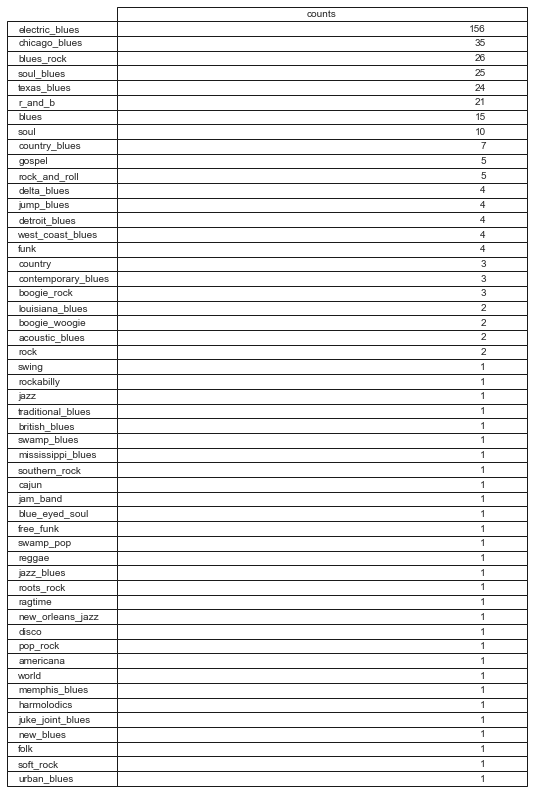

In [107]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText = df.values, rowLabels = df.index,  colLabels=df.columns, loc = 'center')

fig.tight_layout()

plt.show()

In [108]:
# plotly doesn't export well because it appears with scroll bar and only exports the view
# fig = go.Figure(data=[go.Table(
#     header=dict(values=[df.index.name]+list(df.columns),
#                 fill_color='paleturquoise',
#                 align='left'),
#     cells=dict(values=[df.index, \
#                        df[('counts')], \
#                       ], \
#                fill_color='lavender',
#                align='left'))
# ])

# fig.show()

Export:

In [109]:
# plt.savefig('/Users/Daniel/Code/Genre/visualizations/genres_appearing_with_electric_blues.pdf', bbox_inches = 'tight')
# #fig.write_image('/Users/Daniel/Code/Genre/visualizations/genres_appearing_with_electric_blues.pdf')